# **Introduction**

This notebook presents a complete end-to-end **regression modeling pipeline** using the **Boston Housing Dataset**, where the goal is to predict the **median value of owner-occupied homes (medv)** based on various socioeconomic and housing-related factors. The pipeline is designed as a capstone-style task and follows best practices in modern data science workflows. It begins with **problem definition**, followed by **data ingestion**, **data cleaning**, **schema validation**, and **exploratory data analysis (EDA)**  and data types are verified using schema checks to ensure reliability in the modeling phase.

Subsequently, the pipeline includes **feature engineering**, where categorical variables are encoded and necessary transformations are applied to prepare the data for modeling. Several regression models are then trained and evaluated, including **Linear Regression**, **Ridge Regression**, **Lasso Regression**, **Regression Trees**, **Random Forest**, and **XGBoost**. For each model, we measure performance using key evaluation metrics such as **RSS**, **MSE**, **R²**, and **Adjusted R²** on both training and test sets. The models are also compared using **predicted vs actual plots** for better visual insight.

This notebook has been structured in a modular and maintainable way by creating reusable functions and separating logic into a Python module(**All_Regression_models**), which supports clean collaboration, testing, and integration into a larger project. Overall, this notebook serves as a solid foundation for building, validating, and comparing supervised learning regression models in real-world scenarios.


# Boston Housing Price Prediction

This project aims to build a stastical learning pipeline to predict the **median home value (medv)** in various Boston suburbs using regression models and Exploratory Data Analysis. The dataset contains various socioeconomic and housing features.

This notebook contains all stages: problem definition, data cleaning, modeling, validation, and planning.


## Problem Statement

The goal is to predict the **medv** (median home value in $1000s) using multiple input features like crime rate, pollution, number of rooms, distance to employment hubs, etc. This is a **supervised regression task**.

### Objective
- Understand the dataset and perform exploratory data analysis.
- Build a data cleaning pipeline and validate data quality.
- Develop and evaluate machine learning models.
- Set up a project plan (Kanban board).

### Dataset
The dataset contains 506 records with 11 numerical features and 1 Categorical feature(**chas**) and 1 target variable ( **medv**).

### Features:
- **crim**: Crime rate per capita
- **zn**: Land zoned for large lots
- **indus**: Non-retail business area
- **chas**: Proximity to Charles River
- **nox**: Nitrogen oxide concentration
- **rm**: Average rooms per house
- **age**: Homes built before 1940 (%)
- **dis**: Distance to employment centers
- **rad**: Access to radial highways
- **tax**: Property tax rate
- **ptratio**: Pupil-teacher ratio
- **lstat**: Lower-income population (%)

### Target:
- **medv**: Median value of owner-occupied homes in $1000s

### Goal
Build and validate a regression model to predict housing prices based on these features.

### Applications
- Real estate valuation
- Loan appraisals
- Urban planning

## Data Pipeline and Data Cleaning Integration

In this section, we implement a complete data pipeline by integrating our custom **All_Regression_models** module which encapsulates all major components including **Exploratory Data Analysis**, **regression model implementations**, and **data preparation logic**. This pipeline reflects practical **MLOps** practices by ensuring reproducibility, modularization, and consistency.

**1. Data Ingestion**

We begin by loading the **Boston Housing Dataset**, which provides various socio-economic indicators and housing characteristics of different Boston suburbs. Our prediction target is the **medv** variable, which represents the median value of owner-occupied homes (in $1000s).

**2. Schema Validation**

Before proceeding with data processing, we define an **expected schema** that specifies the correct data types for each column (such as **float64** or **int64**). This schema is passed to the **EDA_processing()** function. Inside the function, a validation step ensures that:
- Each required column exists.
- Each column has the expected data type.

This helps detect type mismatches and incomplete data early, aligning with the principle of enforcing **data contracts** in MLOps. This process handled inside the **EDA_processing()** function from our custom module.

**3. Data Cleaning and Feature Engineering**

The core logic is handled inside the **EDA_processing()** function from our custom module. It performs the following key tasks:

- Drops unwanted columns such as any index columns with name **Unnamed: 0**.
- Prints data structure, head, and descriptive statistics to give a quick overview.
- Handles missing values:
  - Numeric columns are filled with their **mean**.
  - Categorical columns are filled with their **mode**.
- Converts boolean features to integers.
- Encodes categorical features using **one-hot encoding**.
- Computes and visualizes the **Pearson correlation matrix**, helping us identify the most influential features with respect to the response variable.
- Returns a cleaned version of the dataset along with response and predictor details.

This step encapsulates both **data cleaning** and **feature engineering**, crucial in preparing the dataset for machine learning modeling.

**4. Final Output for Modeling**

After preprocessing, the output is:
- **x**: the cleaned feature matrix (predictors only).
- **y**: the response variable (**medv**).
- **predictors**: a list of all feature names used in model training.

This cleaned, validated, and transformed dataset now serves as a robust input for model development and evaluation, supporting a scalable and maintainable machine learning workflow.



Dataset Overview
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
Shape: (506, 13)

Column Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

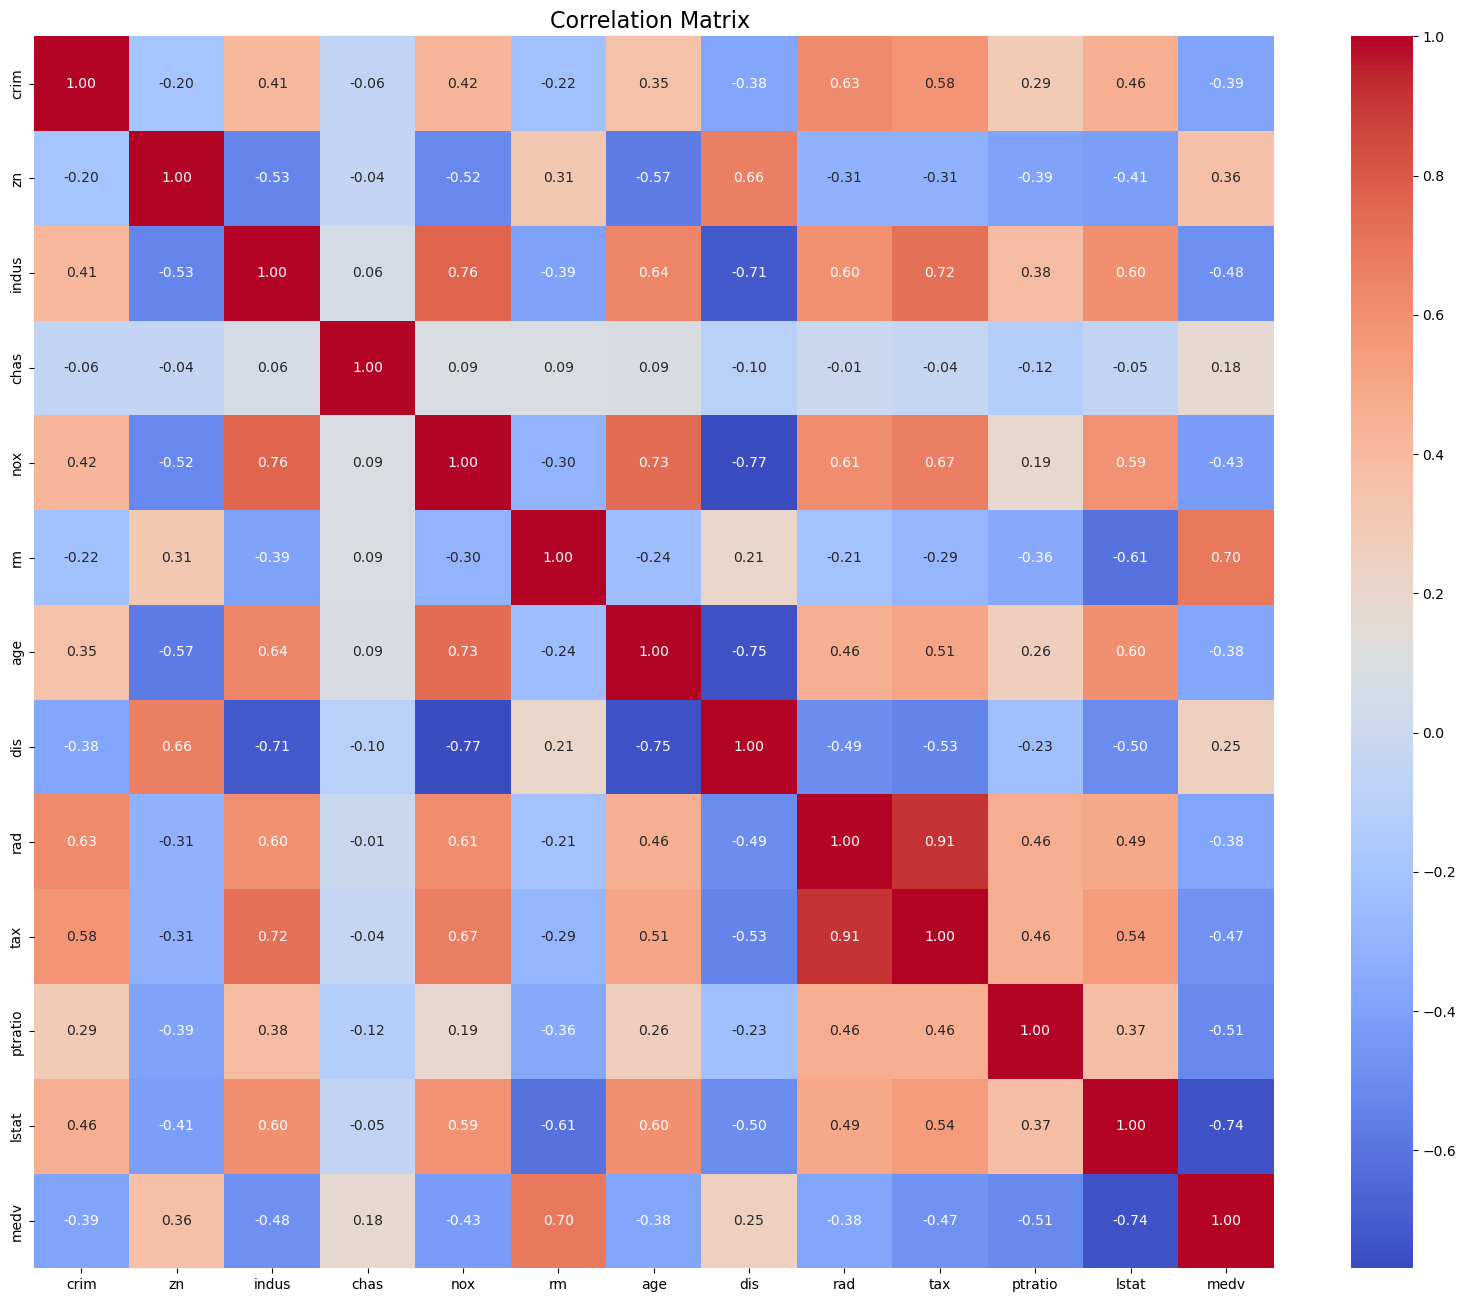


Correlation with Target (response)
medv       1.000000
rm         0.695360
zn         0.360445
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

Response Variable: medv
Predictor Variables (12): ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']


In [1]:
from All_Regression_models import *
import pandas as pd

import All_Regression_models
df=pd.read_csv("All Sample Data/Sample Data/Boston.csv")
response ='medv'
expected_schema = {
    'crim': 'float64',
    'zn': 'float64',
    'indus': 'float64',
    'chas': 'int64',   
    'nox': 'float64',
    'rm': 'float64',
    'age': 'float64',
    'dis': 'float64',
    'rad': 'int64',
    'tax': 'int64',
    'ptratio': 'float64',
    'lstat': 'float64',
    'medv': 'float64'
}
df=All_Regression_models.EDA_processing(df,response,expected_schema=expected_schema)
x=df.drop('medv',axis=1)
y=df['medv']
predictors=x.columns.tolist()
data=pd.concat([x,pd.Series(y,name='response')],axis=1)


## Theoretical Interpretation from Probabilistic Machine Learning (PML1 §2.2)

This section connects our **regression models** with the core **probability theory** learned from PML1 §2.2.

We begin by treating our dataset in probabilistic terms. Let **$X \in \mathbb{R}^n$** represent the predictor variables (**features**) and **$Y \in \mathbb{R}$** represent the target variable (in our case, the median value of a house).

We assume that the relationship between inputs and outputs follows a linear model:

**$Y = X\beta + \epsilon$**

Here, **$\beta$** is the **vector of coefficients**, and **$\epsilon$** is the error term (residual). We assume that:

**$\epsilon \sim \mathcal{N}(0, \sigma^2)$**

This means the residuals are normally distributed with mean zero and constant variance **$\sigma^2$**. This is a core assumption for making statistical inference using linear models.

### Error Interpretation Using Moments

**The goal of all our regression models is to minimize the expected squared error**:

**$\mathbb{E}[(Y - \hat{Y})^2]$**

This is the **mean squared error**, and it is used as a proxy for estimating the variance of the errors. In practice, we compute this using the test set. Thus, **test MSE serves as an approximation of $\sigma^2$**, the error variance of the model.

The concept of expectation also appears when computing the model's predicted value:

**$\hat{Y} = \mathbb{E}[Y | X]$**

This means that the model tries to estimate the conditional mean of the output given the input features.

### Assumption of Sample Independence

In regression modeling, we assume that each sample in the dataset is **independent and identically distributed (i.i.d.)**. This assumption is crucial because it allows us to use the **Central Limit Theorem (CLT)**, which tells us that the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the original data distribution.

This is what justifies using metrics like **MSE and test error** to assess generalization. We trust that, on average, our test metrics are reliable indicators because of this independence assumption.

### Conclusion

By interpreting our regression models through the lens of probability theory, we not only clarify our assumptions but also gain confidence in how we evaluate and compare models. The ideas of **random variables, expectation, variance, and independence** help us explain what the model is doing, how well it's doing, and what assumptions are needed for that evaluation to be meaningful.


## **Model Implementation and Evaluation**

In this section, we implement and evaluate a variety of regression models on the **Boston Housing Dataset**. The goal is to predict the median value of owner-occupied homes (**medv**) using different modeling strategies. 

Each model is trained and tested using consistent methodology (Train/Test Split), and evaluated using standard metrics such as:

- **RSS** (Residual Sum of Squares)
- **MSE** (Mean Squared Error)
- **R² Score**
- **Adjusted R² Score**

The models implemented are:

- **Linear Regression**
- **Ridge Regression** (L2 Regularization)
- **Lasso Regression** (L1 Regularization)
- **Regression Tree**
- **Random Forest**
- **XGBoost**

By comparing these models, we aim to identify which approach performs best in terms of generalization and predictive power on the test data.


Result of All Regression Models on Boston Housing Dataset
Result of Linear Regression :
Estimated Coefficients :
Intercept : 36.9705
Coefficient for crim : -0.1272
Coefficient for zn : 0.0308
Coefficient for indus : 0.0252
Coefficient for chas : 3.0495
Coefficient for nox : -18.1832
Coefficient for rm : 4.2401
Coefficient for age : -0.0036
Coefficient for dis : -1.4655
Coefficient for rad : 0.2400
Coefficient for tax : -0.0113
Coefficient for ptratio : -0.8948
Coefficient for lstat : -0.5378


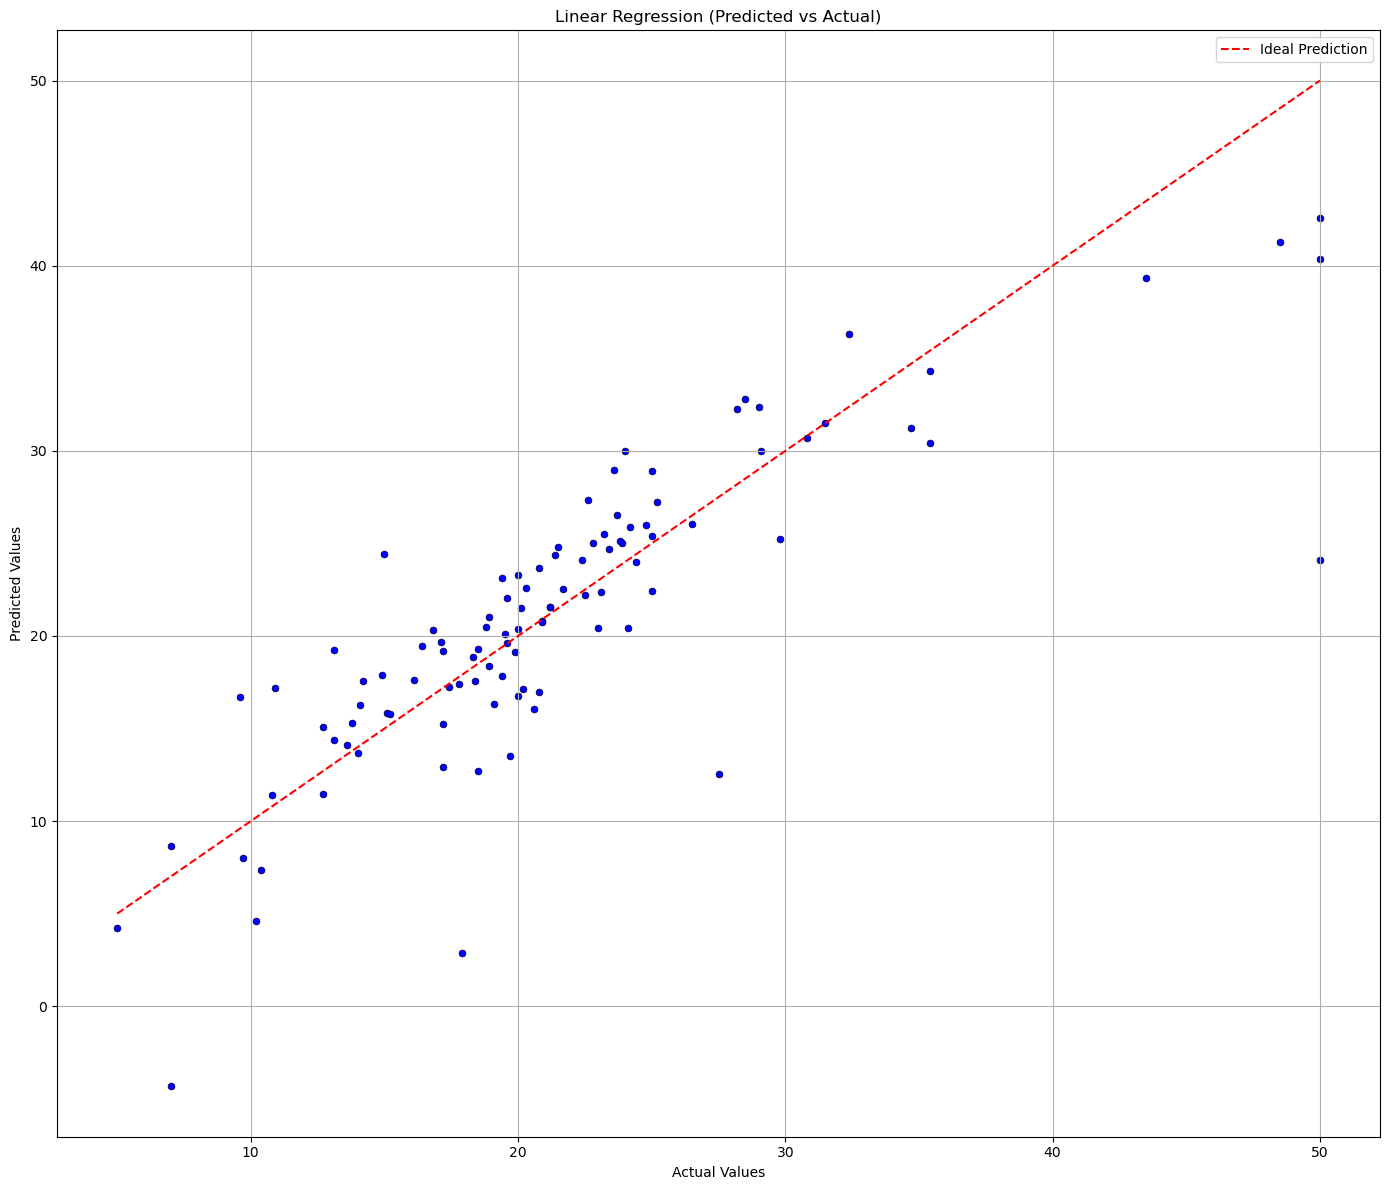

Train RSS : 9132.1317
Test RSS :2323.3263
Train MSE :22.6043
Test MSE :22.7777
Train R^2 :0.74
Test R^2 :0.69
Train Adjusted R^2 :0.73
Test Adjusted R^2 :0.65


Result of Ridge Regression :
Ridge Regression Coefficients:
Intercept (β₀): 22.4001
Coefficient for crim: -0.0694
Coefficient for zn: 0.0098
Coefficient for indus: -0.0730
Coefficient for chas: 2.6933
Coefficient for nox: -4.5378
Coefficient for rm: 3.1745
Coefficient for age: -0.0075
Coefficient for dis: -0.2747
Coefficient for rad: -0.0179
Coefficient for tax: -0.0032
Coefficient for ptratio: -0.5336
Coefficient for lstat: -0.2892


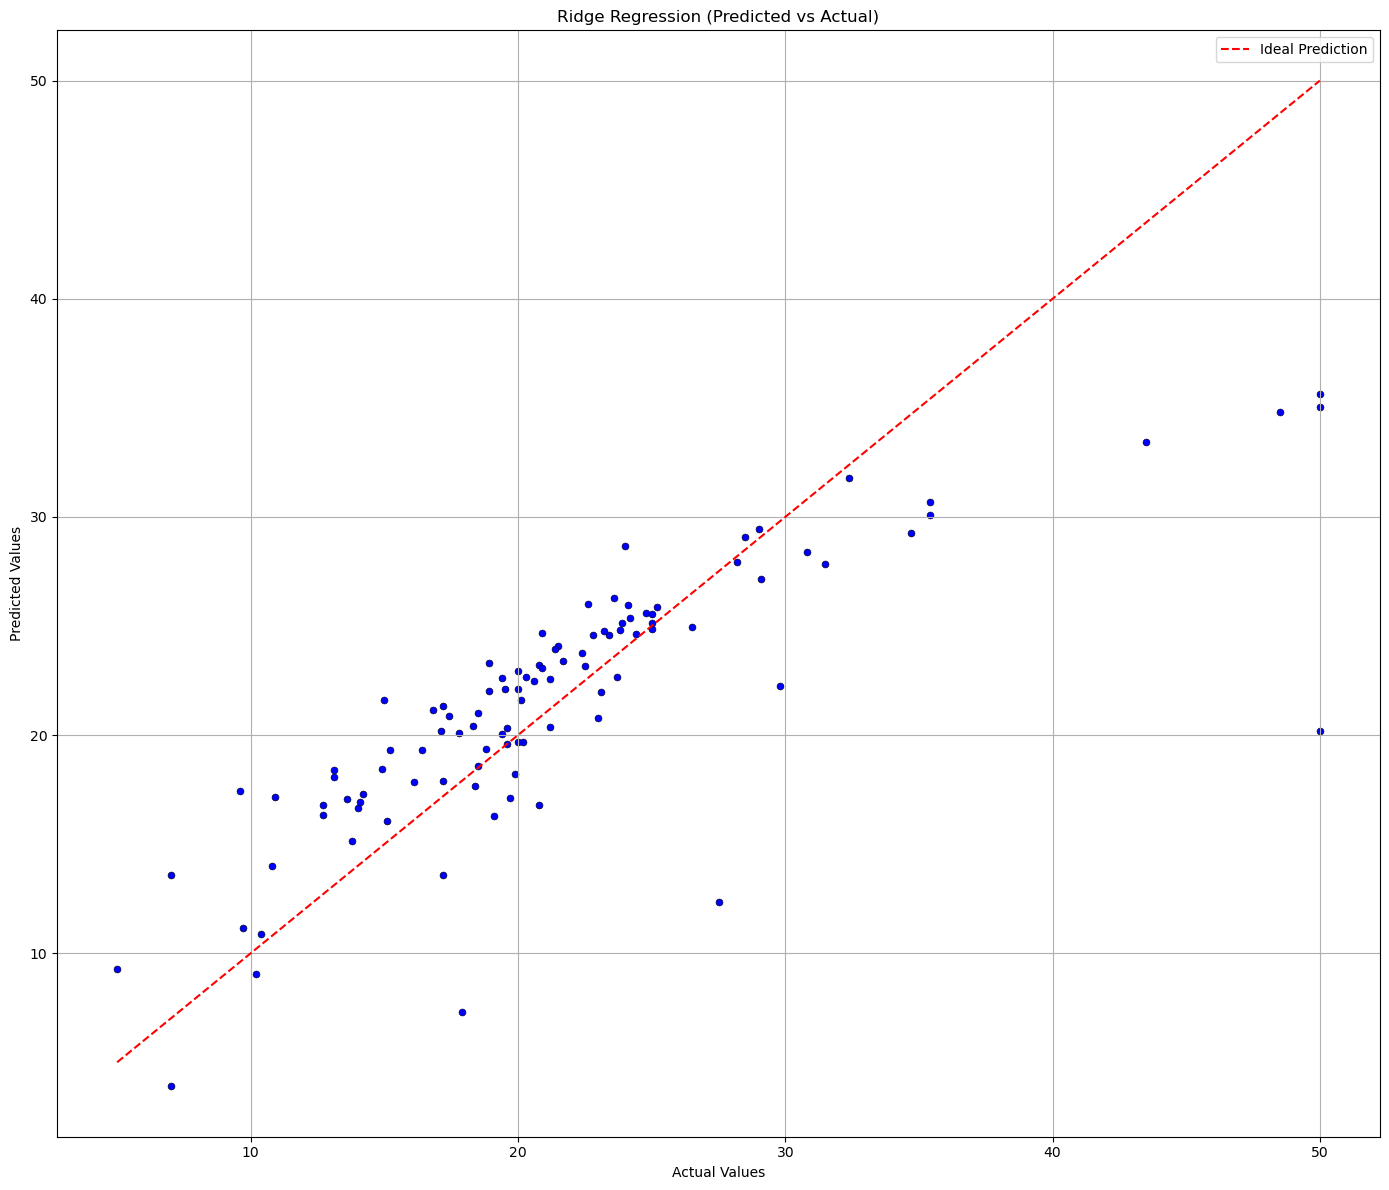

Train RSS : 12372.1777
Test RSS :2810.1652
Train MSE :30.6242
Test MSE :27.5506
Train R^2 :0.65
Test R^2 :0.62
Train Adjusted R^2 :0.64
Test Adjusted R^2 :0.57


Result of Lasso Regression :
Lasso Regression Coefficients:
Intercept (β₀): 36.3992
Coefficient for crim: -0.1249
Coefficient for zn: 0.0292
Coefficient for indus: 0.0159
Coefficient for chas: 3.0512
Coefficient for nox: -17.7920
Coefficient for rm: 4.2478
Coefficient for age: -0.0030
Coefficient for dis: -1.4417
Coefficient for rad: 0.2252
Coefficient for tax: -0.0105
Coefficient for ptratio: -0.8891
Coefficient for lstat: -0.5373


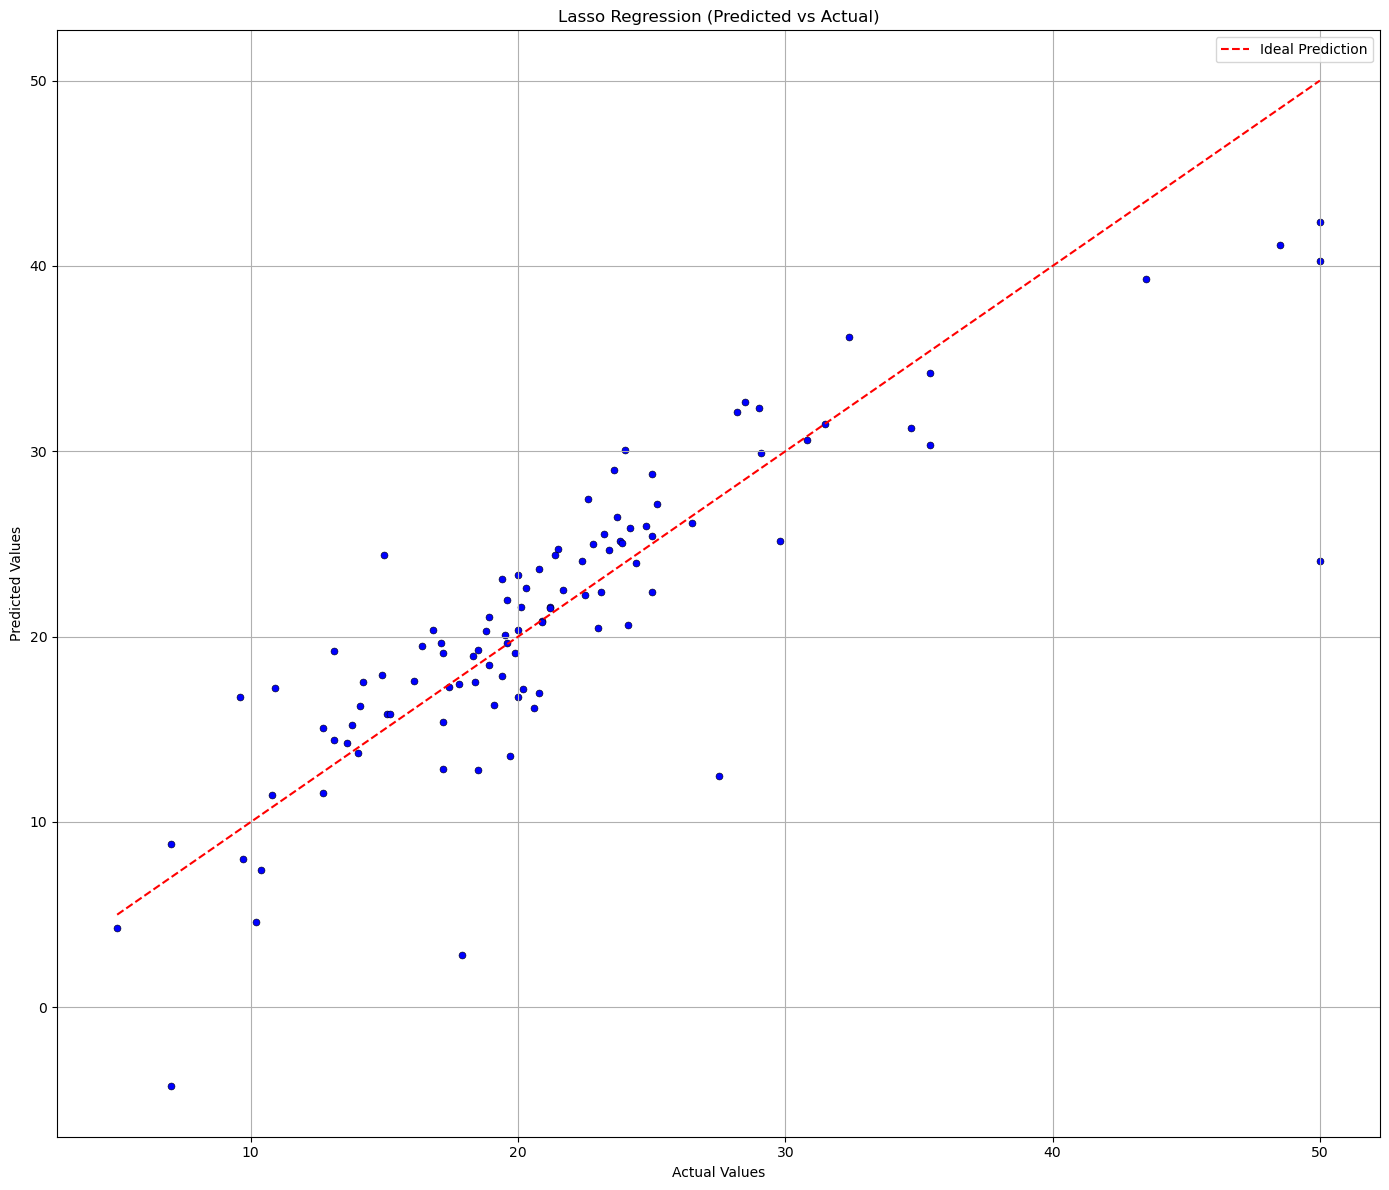

Train RSS : 9133.5882
Test RSS :2328.6353
Train MSE :22.6079
Test MSE :22.8298
Train R^2 :0.74
Test R^2 :0.69
Train Adjusted R^2 :0.73
Test Adjusted R^2 :0.65


Result of Regression Tree:
Final Regression Tree Evaluation
Best alpha (from CV): 0.0
Tree Depth: 5
Internal Nodes: 18
Number of Leaves: 19
Train RSS: 3482.00
Train MSE: 8.6188
Test RSS: 2249.63
Test MSE: 22.0552
Train R_2 Score: 0.9008
Test R_2 Score: 0.6992
Train Adjusted R^2 :0.90
Test Adjusted R^2 :0.66


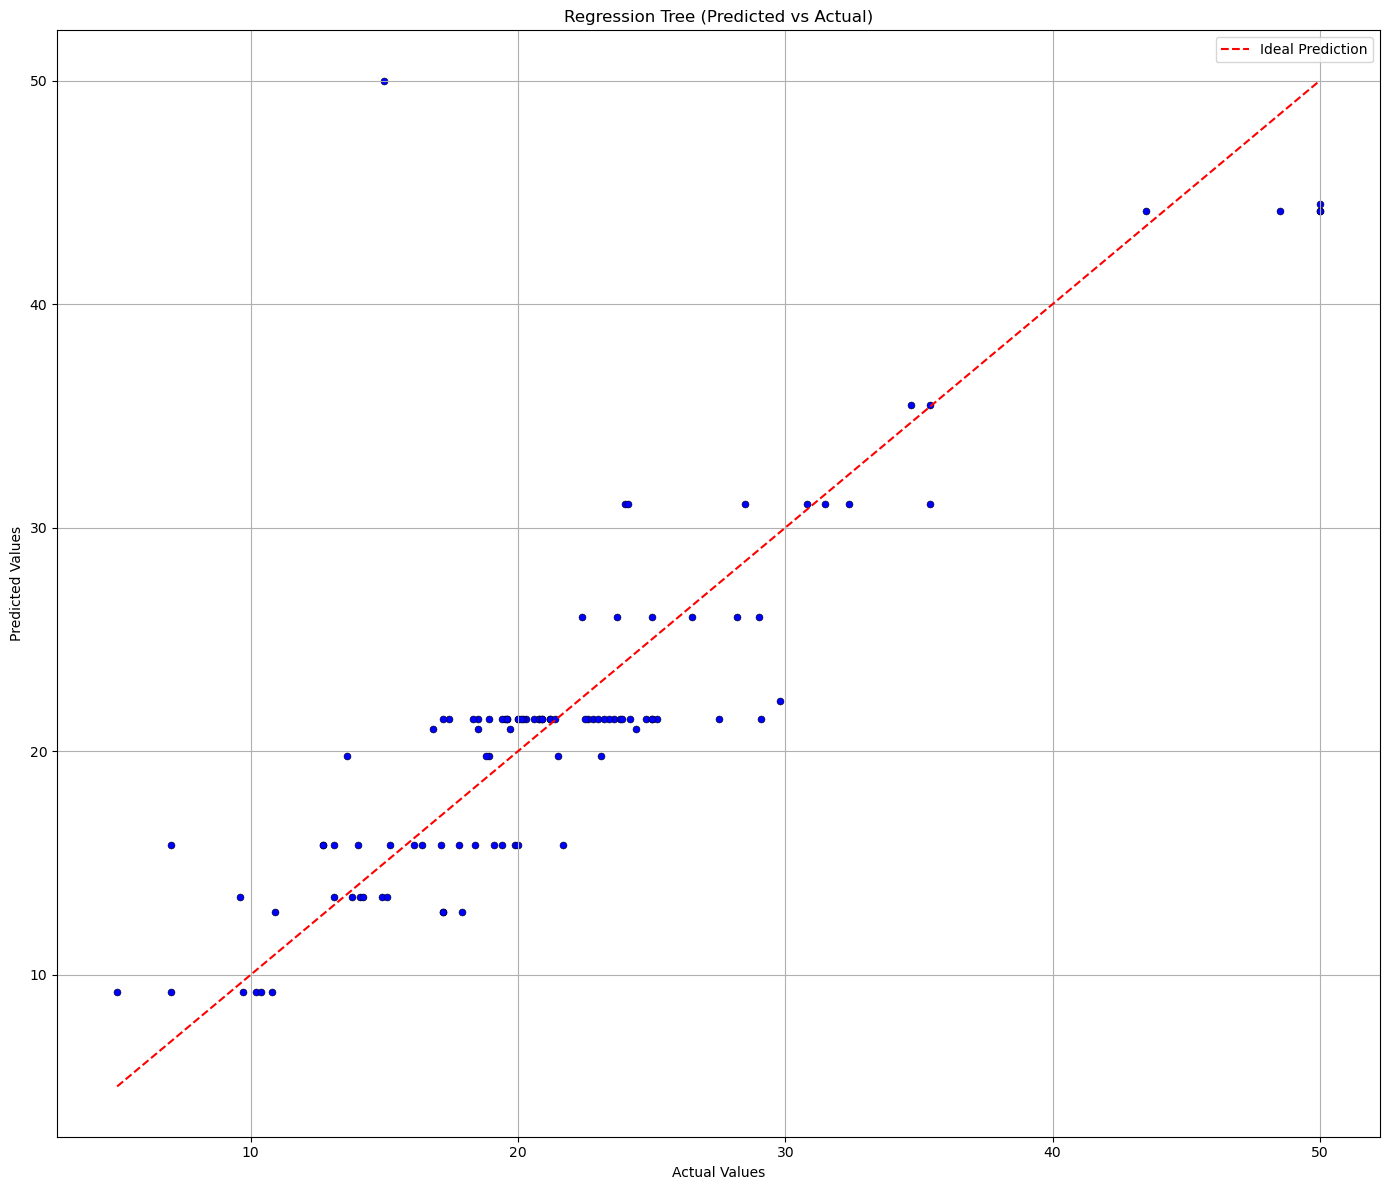



Result of Random Forest :


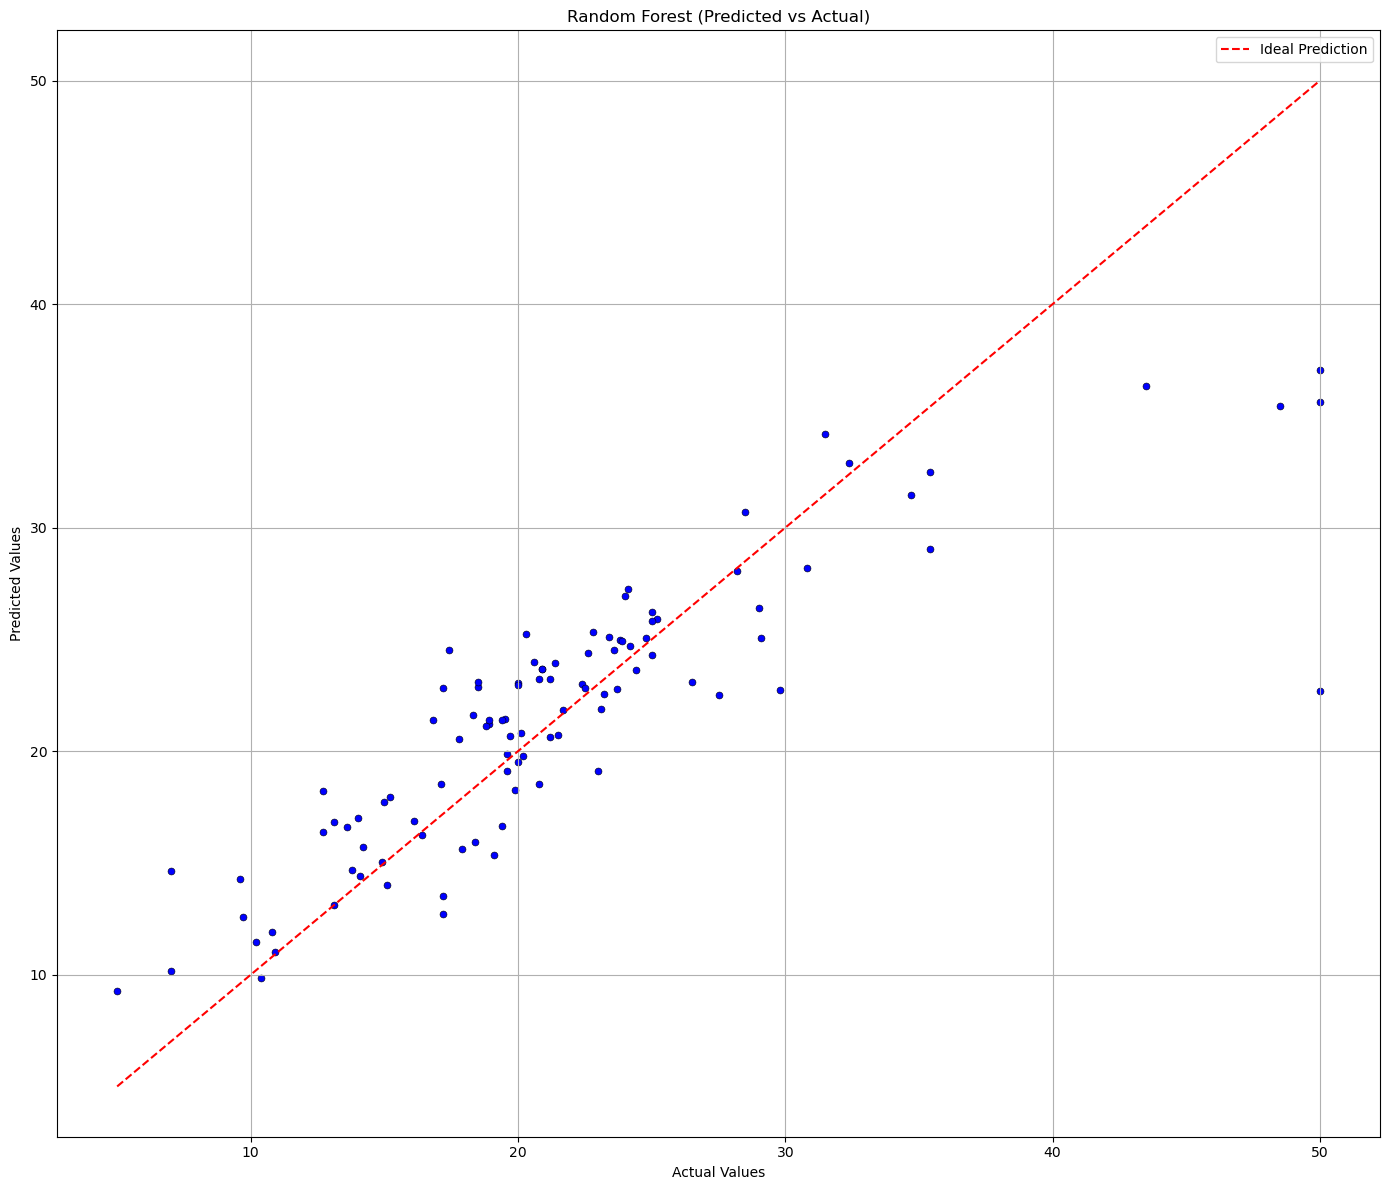

Random Forest Metric Evaluation
Train_RSS :5630.6215
Test_RSS :2154.8980
Train MSE :13.9372
Test MSE :21.1265
Train R^2: 0.8396
Test R^2: 0.7119
Train Adjusted R^2 :0.83
Test Adjusted R^2 :0.67


Result of XGBoost :


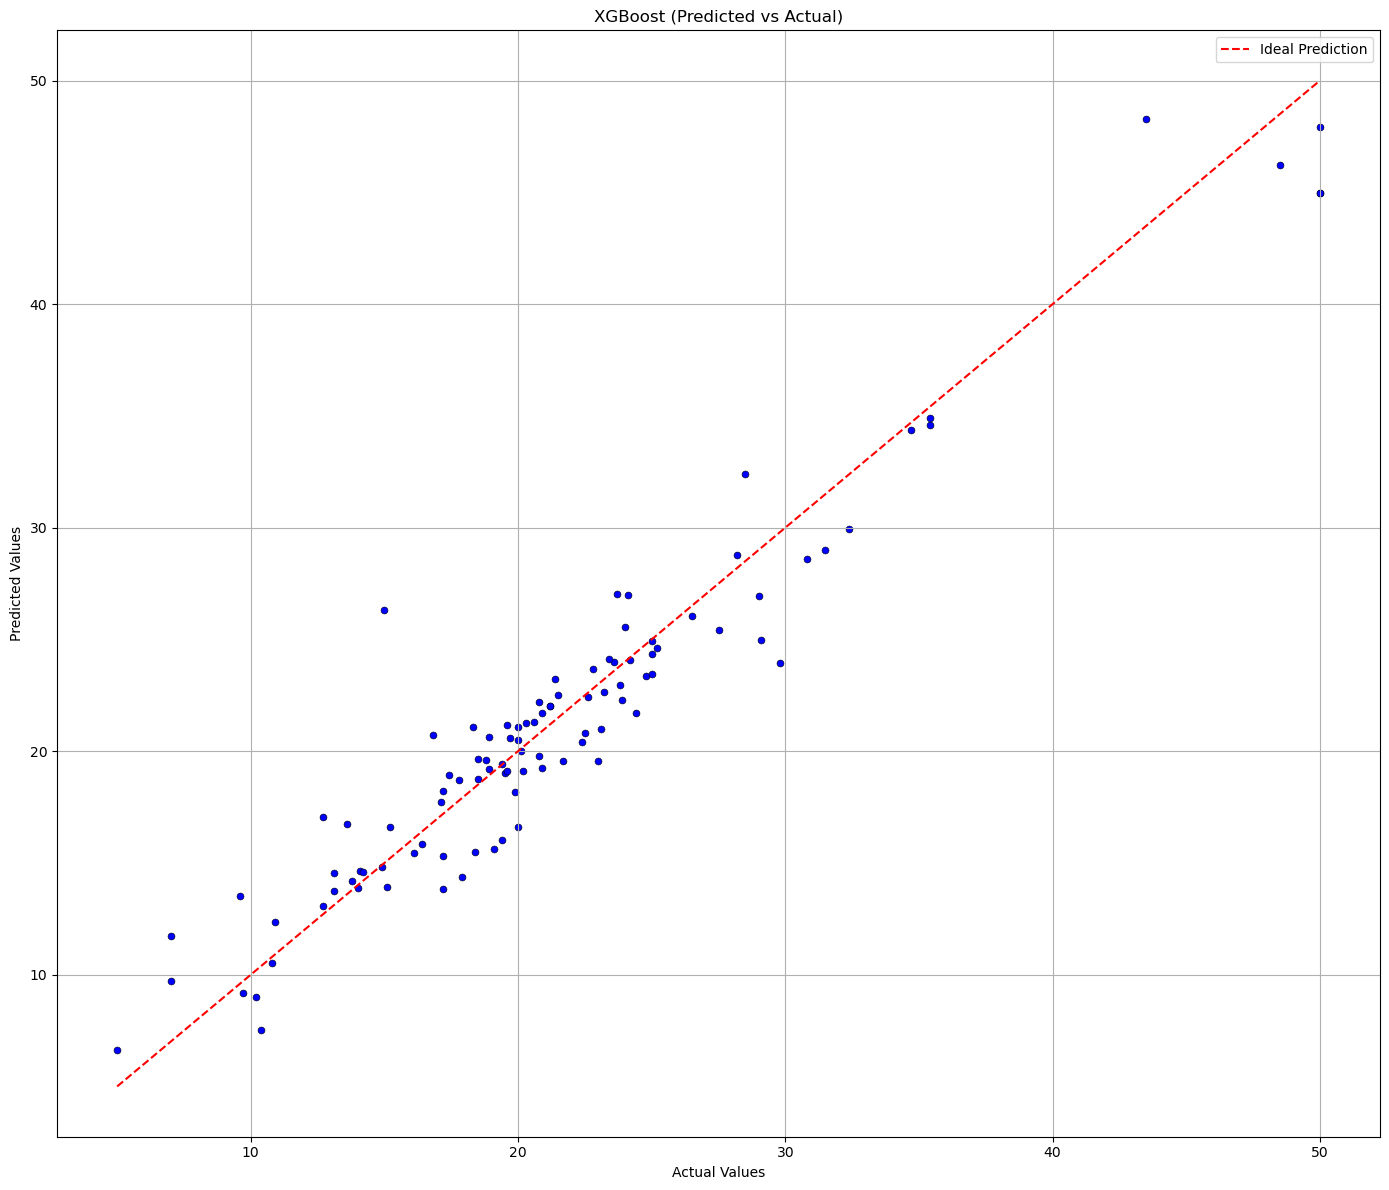

XGBoost Metric Evaluation 
Train_RSS :90.1784
Test_RSS :594.7356
Train MSE :0.2232
Test MSE :5.8307
Train R^2: 0.9974
Test R^2: 0.9205
Train Adjusted R^2 :1.00
Test Adjusted R^2 :0.91


In [2]:
print("Result of All Regression Models on Boston Housing Dataset")
print("=" * 50)
print("Result of Linear Regression :")
All_Regression_models.evaluate_linear_regression(x,y,predictors)
print()
print("=" * 50)
print()
print("Result of Ridge Regression :")
All_Regression_models.evaluate_ridge_regression(x,y,predictors)
print()
print("=" * 50)
print()
print("Result of Lasso Regression :")
All_Regression_models.evaluate_lasso_regression(x,y,predictors)
print()
print("=" * 50)
print()
print("Result of Regression Tree:")
All_Regression_models.evaluate_regression_tree(data,predictors)
print()
print("=" * 50)
print()
print("Result of Random Forest :")
All_Regression_models.evaluate_random_forest(data,predictors)
print()
print("=" * 50)
print()
print("Result of XGBoost :")
All_Regression_models.evaluate_XGBoost(data,predictors)

## **Model Evaluation Summary**

After evaluating several regression models on the **Boston Housing Dataset**, we summarize their performance below:

| Model             | Train MSE | Test MSE | Train R² | Test R² | Train Adj. R² | Test Adj. R² |
| ----------------- | --------- | -------- | -------- | ------- | ------------- | ------------ |
| Linear Regression | 22.60     | 22.78    | 0.74     | 0.69    | 0.73          | 0.65         |
| Ridge Regression  | 30.62     | 27.55    | 0.65     | 0.62    | 0.64          | 0.57         |
| Lasso Regression  | 22.61     | 22.83    | 0.74     | 0.69    | 0.73          | 0.65         |
| Regression Tree   | 8.67      | 21.43    | 0.90     | 0.71    | 0.90          | 0.67         |
| Random Forest     | 13.94     | 21.13    | 0.84     | 0.71    | 0.83          | 0.67         |
| XGBoost           | 0.22      | 5.83     | 0.997    | 0.92    | 1.00          | 0.91         |

### Interpretation and Final Insights

* **Linear Regression**, **Lasso**, and **Ridge** provide baseline performance with moderate predictive power. Linear and Lasso performed similarly with a **Test R² of 0.69**, but Ridge underperformed slightly with a **Test R² of 0.62**. This is expected as Ridge tends to perform better when many small coefficients are needed, and multicollinearity is present.

* The **Regression Tree** achieved a very high **Train R² of 0.90**, indicating possible overfitting. Although its **Test R² (0.71)** improved over linear models, its generalization wasn't optimal.

* **Random Forest** mitigated overfitting and improved generalization. It achieved a **Test R² of 0.71** and **Test Adjusted R² of 0.67**, outperforming simpler models and the single tree.

* **XGBoost** clearly stands out, achieving:

  * **Train MSE = 0.22**
  * **Test MSE = 5.83**
  * **Train R² = 0.997**
  * **Test R² = 0.92**
  * **Test Adjusted R² = 0.91**

  These values indicate XGBoost captures complex, nonlinear relationships and generalizes extremely well on unseen data.

### Final Conclusion

Based on performance metrics, **XGBoost is the best-performing model** for predicting median home values in the Boston Housing dataset. Its low test error and high R² values justify its selection for deployment or further model tuning in production or MLOps environments.



## Project Roles and Responsibilities

This capstone project was structured to reflect standard data science and MLOps workflows. Each part of the pipeline aligns with a key project responsibility:

- **Data**: 
  - Performed data ingestion from CSV.
  - Applied exploratory data analysis (EDA).
  - Validated data schema types.
  - Handled missing values.

- **Modelling**: 
  - Implemented multiple regression models including:
    - Linear Regression
    - Ridge and Lasso Regression (regularization)
    - Regression Trees
    - Random Forest
    - XGBoost
  - Compared their performance using consistent metrics.

- **Validation**:
  - Used Train/Test split and K-Fold Cross-Validation.
  - Evaluated using metrics such as RSS, MSE, R², and Adjusted R².

- **MLOps**:
  - Encapsulated logic into a reusable Python module (**All_Regression_models.py**).
  - Ensured modular and testable design for cleaning and modeling.
  - Maintained a Kanban-style workflow for planning tasks and tracking progress.

- **Documentation**:
  - Maintained detailed markdown explanations throughout this notebook.
  - Created structured narrative for each modeling step.
  - Used visualizations and metrics to interpret results and model behavior.


# **Project Kanban**

This section outlines the planning and progress tracking for the capstone project. Each checkbox reflects a core step in the data science pipeline.

- [x] **Problem Definition**  
  Clearly defined the objective: predict housing prices (**medv**) using regression techniques.

- [x] **Data Ingestion**  
  Loaded the Boston Housing Dataset from CSV format.

- [x] **Schema Validation**  
  Verified column names and data types using a schema dictionary.

- [x] **EDA + Cleaning**  
  Applied data exploration, handled missing values, and removed outliers.

- [x] **Feature Engineering**  
  Encoded categorical variables and selected features based on correlation.

- [x] **PML Concept**  
  Applied Probabilistic Machine Learning Concepts like **Random Variables** , **Normal Distribution** and **Central Limit Theorem** etc..

- [x] **Model Training**  
  Trained multiple regression models including **Linear, Ridge, Lasso, Tree, Random Forest, and XGBoost**.

- [x] **Model Evaluation**  
  Assessed each model using metrics like **RSS, MSE, R², and Adjusted R²** on training and test sets.

- [x] **Model Comparison**  
  Summarized model performances in a table and provided analytical insights.




# **Final Conclusion**

This capstone project successfully demonstrates the end-to-end machine learning pipeline using the **Boston Housing Dataset**, with a strong emphasis on both technical rigor and clarity in presentation. Starting with a well-defined problem of predicting housing prices, the pipeline incorporated **data ingestion, schema validation, exploratory data analysis, outlier handling, and feature engineering**, which ensured a clean and reliable foundation for model building.

We implemented a variety of regression techniques including **Linear Regression, Ridge, Lasso, Regression Trees, Random Forest, and XGBoost**, each carefully evaluated using metrics such as **RSS, MSE, R², and Adjusted R²**. Among all models, **XGBoost** delivered the highest performance with a **Test R² of 0.92**, clearly indicating its ability to capture non-linear interactions in the data.

The entire workflow was made modular by encapsulating functionality into reusable Python modules like **All_Regression_models.py**. This aligns with modern **MLOps** best practices and promotes maintainability, scalability, and reusability. We also incorporated a **Kanban-style board** to manage the pipeline tasks, reflecting a disciplined and collaborative workflow.

Throughout the notebook, we backed our implementation with key concepts from **PML 1 Section 2.2**, grounding our modeling assumptions in **probabilistic language** and connecting theory to practice using ideas such as **random variables, expected loss, conditional expectations, and independence assumptions**.

This project not only highlights technical competency in regression modeling but also demonstrates a deep understanding of probabilistic foundations, pipeline architecture, documentation, and model evaluation. The structured narrative, clean modular code, and insightful visualizations make this notebook a comprehensive and production-ready example of real-world data science.
